# Artificial neural network (ANN) for **Classification**

Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

Importing dataset

In [2]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Each pixel has a value between 0–255. We normalize the values to 0–1.
X_train, X_test = X_train / 255.0, X_test / 255.0

print("X_train.shape: ", X_train.shape)
print("Train set contains ", X_train.shape[0], " images of dimension ", X_train.shape[1], "x", X_train.shape[2])
print("X_test.shape: ", X_test.shape)
print("Test set contains ", X_test.shape[0], " images of dimension ", X_test.shape[1], "x", X_test.shape[2])

11493376/11490434 [==============================] - 0s 0us/step
X_train.shape:  (60000, 28, 28)
Train set contains  60000  images of dimension  28 x 28
X_test.shape:  (10000, 28, 28)
Test set contains  10000  images of dimension  28 x 28


Building the model

In [3]:
model = tf.keras.models.Sequential()

# Flattening the images
model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))

# Adding first layer which has 128 nodes.
model.add(tf.keras.layers.Dense(128, activation = 'relu'))

# Setting dropout Rate to 20%.
# The Dropout layer randomly sets input units to 0
# with a frequency of rate at each step during training time,
# which helps prevent overfitting.
model.add(tf.keras.layers.Dropout(0.2))

# Adding Output layer which has 10 nodes as we have 0 to 9 digits to predict.
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

Compiling the model

In [4]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

Training the model

In [5]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4953 - accuracy: 0.8543 - val_loss: 0.1536 - val_accuracy: 0.9544
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1540 - accuracy: 0.9542 - val_loss: 0.1004 - val_accuracy: 0.9698
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1087 - accuracy: 0.9665 - val_loss: 0.0826 - val_accuracy: 0.9750
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0922 - accuracy: 0.9721 - val_loss: 0.0768 - val_accuracy: 0.9759
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0700 - accuracy: 0.9789 - val_loss: 0.0718 - val_accuracy: 0.9781
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0638 - accuracy: 0.9794 - val_loss: 0.0696 - val_accuracy: 0.9794
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0569 - accuracy: 0.9823 - val_loss: 0.0695 - val_accuracy:

Plotting the loss per iteration

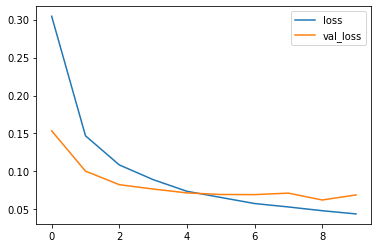

In [6]:
# val_loss is the value of cost function for your cross-validation data
# and loss is the value of cost function for your training data.
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

Also plotting the accuracy per iteration

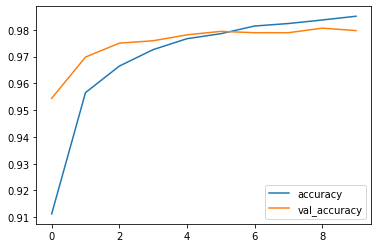

In [7]:
# accuracy refers to accuracy of what was trained against.
# 'val_accuracy' refers to validation set.
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

Evaluating the model

In [8]:
print(model.evaluate(X_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0691 - accuracy: 0.9797
[0.06906823813915253, 0.9797000288963318]


Creating Confusion Matrix

Confusion matrix, without normalization
[[ 972    0    0    2    0    0    3    1    2    0]
 [   0 1129    2    0    0    0    2    0    2    0]
 [   5    2 1009    2    2    0    2    7    3    0]
 [   0    0    3  996    0    2    0    4    1    4]
 [   1    0    2    1  967    0    4    2    0    5]
 [   2    1    0   14    2  869    2    0    1    1]
 [   4    2    0    1    2    4  945    0    0    0]
 [   1    5   10    2    0    0    0 1003    1    6]
 [   5    1    4    7    5    5    1    2  938    6]
 [   3    3    0   10   11    3    1    6    3  969]]


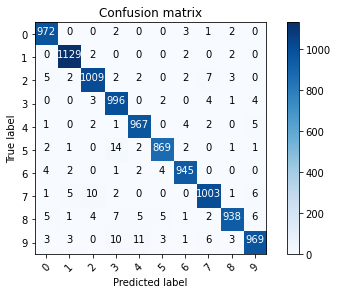

In [9]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = model.predict(X_test).argmax(axis = 1)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, list(range(10))) # for 10 nodes as we have 0 to 9 digits.

Predicting for single image

In [10]:
from keras.preprocessing import image
test_image = image.load_img('test_ans_0.jpeg', color_mode="grayscale", target_size=(28,28,1))
test_image = image.img_to_array(test_image)
test_image = test_image / 255.0
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

classname = result[0]
max_value = max(classname)
max_index = np.where(classname == max_value)

print("Predicted value: ", max_index[0][0])

Predicted value:  0


Misclassified examples

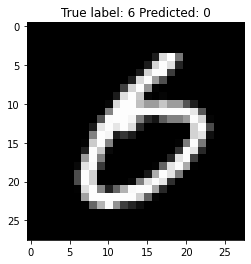

In [11]:
misclassified_idx = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], y_pred[i]));